# Домашнє завдання: Інтерактивні візуалізації з Plotly

## Опис завдання
У цьому домашньому завданні ви будете створювати інтерактивні візуалізації з допомогою бібліотеки Plotly. Ви дізнаєтесь різницю між Plotly Express (швидкі графіки) та Graph Objects (повний контроль), та створите інтерактивний дашборд.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
!plotly_get_chrome -y

Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\choreographer\cli\browser_exe\chrome-win64\chrome.exe


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Завантаження даних
df = pd.read_csv('D:/Studing DATA/Model_python/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Для plotly краще не встановлювати datetime як індекс
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Додаємо назви сезонів
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

## Завдання 1: Базовий інтерактивний лінійний графік (Plotly Express)

**Завдання:**
Створіть інтерактивний лінійний графік динаміки оренди за часом (рівень деталізації - як в даних) з можливістю zoom та hover.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яка перевага інтерактивного графіка над статичним?
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?


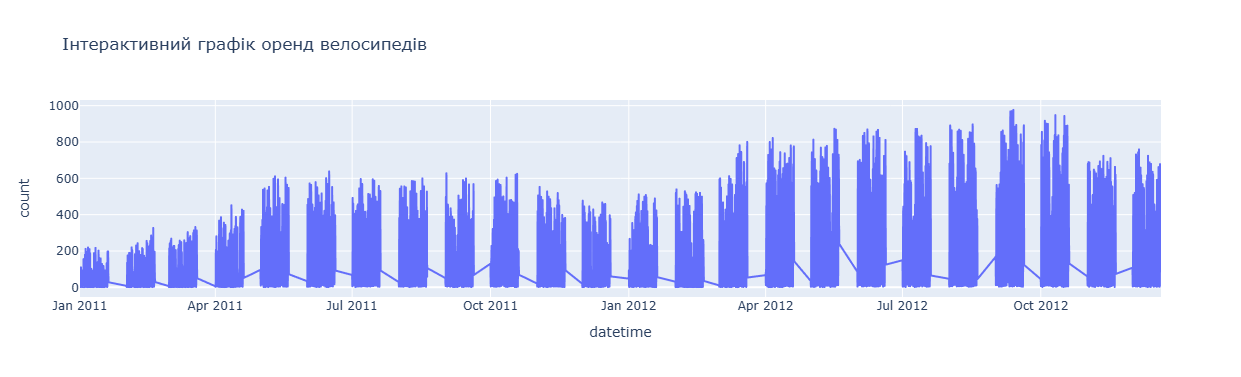

In [4]:
px.line(df, x='datetime', y='count',
              title='Інтерактивний графік оренд велосипедів')

#### Відповіді:
1. Яка перевага інтерактивного графіка над статичним?
    * Ну очевидно, що зручна навігація і деталізація данних, не треба вгадувати яке там значення в тих блоках, наводиш курсор і отримуєш точну інформацію.
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?
   *  це тому, що дані лише з 1 по 19 число місяця і так завжди , проте щоб це помітити на статичному графіку ми робили ресемпл і тоді дата будувалась пандасом , тому відсутні дані по потрібним датам просто Null. На статичному гарфіку теж виникали питання : що не за заломи і прямі лінії?, але дослідити їх треба було додатково, на інтерактивному графіку просто мандруванням по графііку можна побачити, що це закономірність - кожного 19 числа місяця припинявся збір данних . Перезавантаження системи? обслуговування велосипедів? це питання залишається відкритим.

## Завдання 2: Scatter plot з додатковими даними (Plotly Express)

**Завдання:**
Створіть scatter plot кількості орендованих велосипедів випадковими користувачами vs кількості орендованих велосипедів зареєстрованими користувачами. Розмір точок встановіть за сумарною кількістю велосипедів, які були взяті в оренду, а колір - за сезоном. В hover_data - додайте деталі, які допоможуть вам в подальшому аналізі.

Дослідіть графік. Зверніть увагу, що ви можете вмикати і вимикати окремі сезони, якщо будете клікати на колір сезону в легенді графіку.

**Дайте відповідь на питання.**
- Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?
- Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.

In [5]:
fig = px.scatter(df,
                 x='casual',
                 y='registered',
                 size='count',
                 color=df['season_name'],
                 hover_data=['casual', 'registered'],
                 title = 'Аналіз оренди веловипедів відносно статусу клієнтів',
                 labels={'season_name': 'Сезон'})
fig.update_layout(height=600)
fig.show()

In [6]:
df['workingday_str'] = df['workingday'].map({1: 'Так', 0: 'Ні'})

fig = px.scatter(df,
                 x='casual',
                 y='registered',
                 size='count',
                 color=df['workingday_str'],
                 hover_data=['casual', 'registered'],
                 title = 'Аналіз оренди веловипедів відносно статусу клієнті та днів тижня',
                 labels={'workingday_str': 'Будній день'})
fig.update_layout(height=600)
fig.show()

#### Відповіді:
**Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?**
- Дві явні лінії на скатер плоті свідчать про існування як мінімум двох окремих залежностей між змінними, що виникають через приховану змінну (наприклад, будні чи вихідні).Вище графік - це ідеально ілюструє .
**Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.**
  * Аналізуючи обидва графіка, можу виділити наступне:
  - 1 зареєстровані користувачі складають дуже вагому частку оренд для пересування в робочі дні,цей показник в декілька разів більший від звичайних орендарів ( варто звернути увагу що шкала реєстрованих користувачів більше 800 а кежуал всього 350, думаю треба в в таких випадках треба прописувати щоб шкали були однаковими та кбуде наочніше.)
  - 2- кількість оренд здійснена зареєстрованими клієнтами менж вразлива до сезону   
  - 3- маркетингові рішення варто приймати беручи до уваги таку велику різницю між поведінкою зареєстрованих і незареєстрованих користувачів, для цих груп має бути кардинально різний метод залучення.
  
    П.с. не можу спиратись на сезони як на пори року, бо це насправці квартали, тому не дуже правильно казати, що взимку меньше звичайних клієнтів, а восени багато, це все про квартал, відносно самого сезону теж було б цікаво дослідити.

In [7]:
df['workingday_str'] = df['workingday'].map({1: 'Так', 0: 'Ні'})

fig = px.scatter(
    df,
    x='casual',
    y='registered',
    size='count',
    color=df['workingday_str'],
    hover_data=['casual', 'registered'],
    title='Аналіз оренди велосипедів відносно статусу клієнтів та днів тижня',
    labels={'workingday_str': 'Будній день'}
)

# Обмеження осей X та Y від 0 до 900
fig.update_layout(
    height=600,
    xaxis=dict(range=[0, 1900]),
    yaxis=dict(range=[0, 1000])
)

fig.show()


In [8]:
df['workingday_str'] = df['workingday'].map({1: 'Так', 0: 'Ні'})

fig = px.scatter(df,
                 x='registered',
                 y='casual' ,
                 size='count',
                 color=df['workingday_str'],
                 hover_data=['casual', 'registered'],
                 title = 'Аналіз оренди веловипедів відносно статусу клієнті та днів тижня',
                 labels={'workingday_str': 'Будній день'})
fig.update_layout(height=600)
fig.show()

## Завдання 3: Порівняння Plotly Express vs Graph Objects

**Завдання:**
Створіть лінійний графік помісячної динаміки оренди велосипедів двома способами - з Plotly Express та з Graph Objects.

**Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
2. Коли краще використовувати Plotly Express?
3. Коли потрібен Graph Objects?


In [9]:
df['month']

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: month, Length: 10886, dtype: int32

In [10]:
## шось не вийшло 
px.line(df, x='month', y='count',
              title='Інтерактивний графік оренд велосипедів Plotly Express')


In [11]:
monthly_data = df.groupby('month')['count'].sum()
monthly_data 

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [12]:
fig_px = px.line(
    monthly_data,
    title='Помісячна динаміка оренд велосипедів (Plotly Express)',
    labels={'month': 'Місяць', 'value': 'Кількість оренд'}
)
fig_px.update_layout(height=500)
fig_px.show()


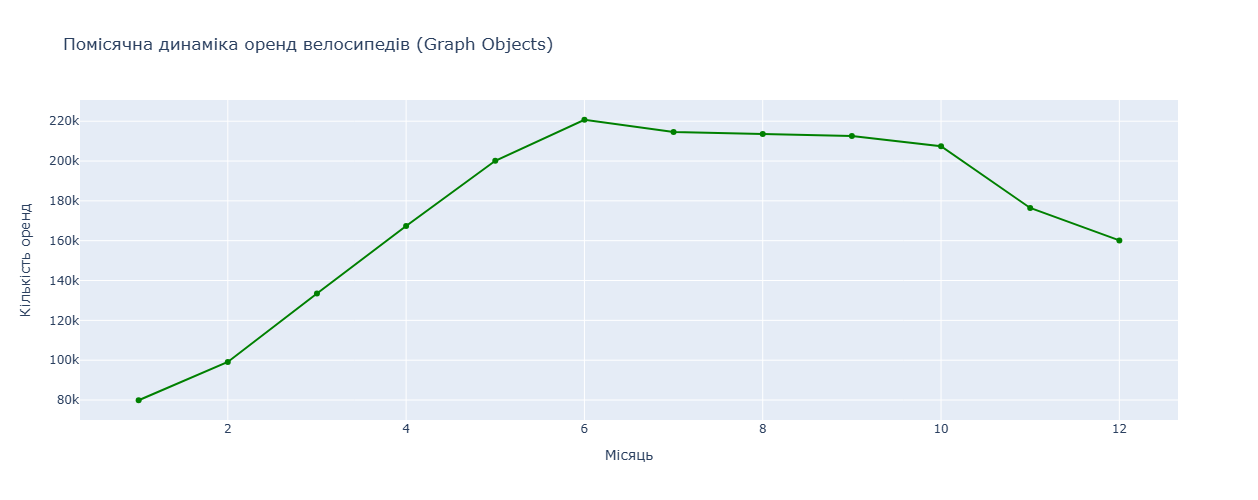

In [43]:
fig_go = go.Figure()

fig_go.add_trace(go.Scatter(
    x=monthly_data.index,   # місяці — індекс Series
    y=monthly_data.values,  # суми оренд — значення Series
    mode='lines+markers',   # o- теж нормально
    name='Оренди',
    line=dict(color='green'),
    marker=dict(size=6)
))

fig_go.update_layout(
    title='Помісячна динаміка оренд велосипедів (Graph Objects)',
    xaxis_title='Місяць',
    yaxis_title='Кількість оренд',
    height=500
)

fig_go.show()

  **Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
 *  різниця в кількості коду, а також в доступі налаштувати графік , кастомізувати його, як пандас і матплотліб.
2. Коли краще використовувати Plotly Express?
 * Коли треба швидке рішення, візуалізація за одни 2 рядки. Щоб самому глянути якусь метрику і зробити висновки, рухатися далі.
   
3. Коли потрібен Graph Objects?
 * Коли треба кастомізувати графік для презентації чи показу колегам вищого левела, коли його можуть застосувати в дашюборд або що, коли важливий вигляд.

## Завдання 4: Дашборд з make_subplots (Graph Objects)

**Завдання:**
Створіть дашборд з 4 різними графіками в одній фігурі:
- Bar chart - середні значення загальної кількості оренд велосипедів за сезонами
- Pie chart - відсоткове співвідношення погодних умов в даних
- Line chart - середнє значення загальної кількості оренд велосипедів за годинами протягом доби
- Scatter plot - кореляція температури vs вологість

Додайте заголовок на дашборд.

**Дайте відповідь на питання**
- На ваш погляд, яка перевага об'єднання графіків в один дашборд?

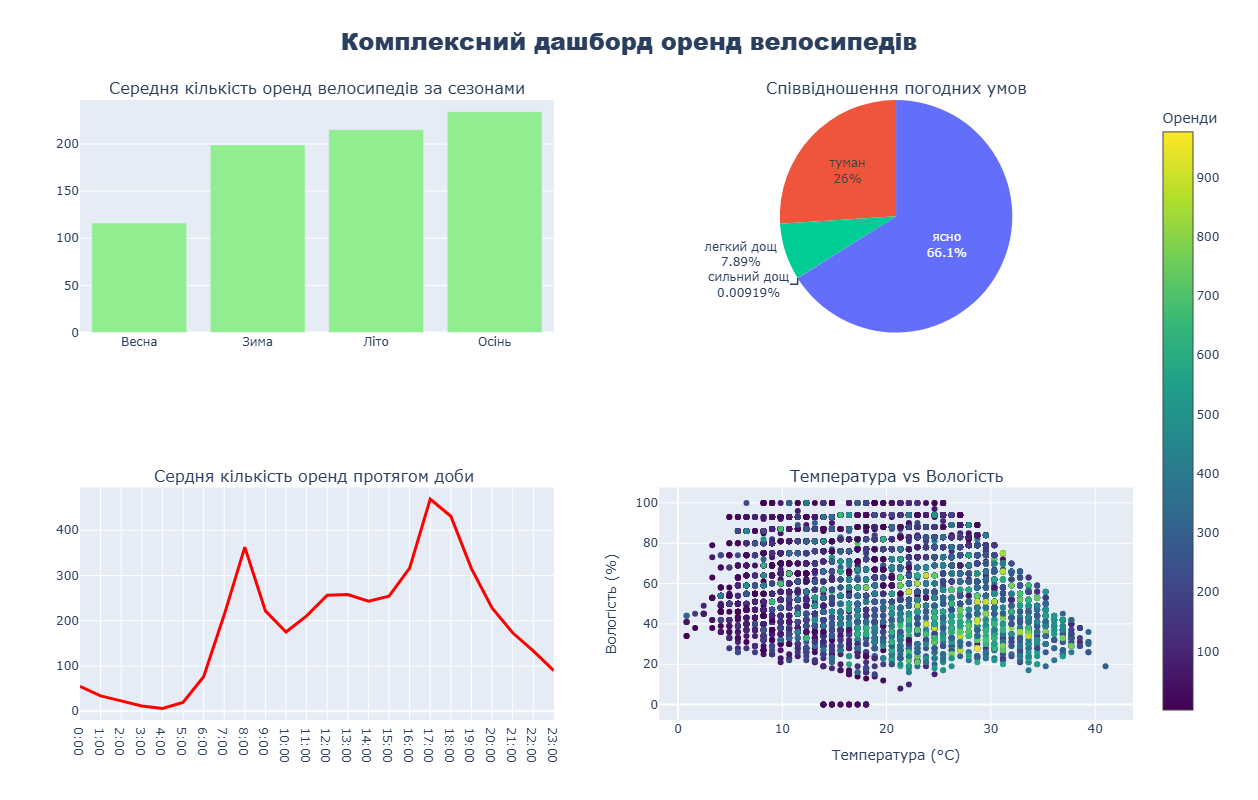

In [15]:
fig = make_subplots(
    rows=2, cols=2,
    specs =[[{"type": "xy"}, {"type": "domain"}],  
            [{"type": "xy"}, {"type": "xy"}]],      
    
    subplot_titles=('Середня кількість оренд велосипедів за сезонами', 'Співвідношення погодних умов',
                    'Сердня кількість оренд протягом доби ', 'Температура vs Вологість')
)

# Графік 1: Барплот
season_data = df.groupby('season_name')['count'].mean().reset_index()
fig.add_trace(
    go.Bar(
        x=season_data['season_name'],
        y=season_data['count'],
        name='season',
        marker_color='lightgreen',
        hovertemplate='Сезон: %{x}<br>Оренд: %{y}<extra></extra>'
    ),
    row=1, col=1
)

 # Графік 2: Пай плот
wether_count = df['weather'].value_counts()

fig.add_trace(
    go.Pie(
          
        values=wether_count.values,   
        hole=0,
        labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        # marker=dict(colors=px.colors.qualitative.Dark24)
    ),
    row=1, col=2
)


# Графік 3: Лінійний
fig.add_trace(
    go.Scatter(
        x=[f'{h}:00' for h in df['hour']], 
        y=df.groupby('hour')['count'].mean().values,
        mode='lines',
        name='Години',
        line=dict(width=3, color='red'),
        hovertemplate='Година: %{x}<br>Оренд: %{y:.1f}<extra></extra>'
    ),
    row=2, col=1
)


# Графік 4: Scatter з кольором
fig.add_trace(
    go.Scatter(
        x=df['temp'],
        y=df['humidity'],
        mode='markers',
        marker=dict(
            color=df['count'],
            colorscale='viridis',
            colorbar=dict(title='Оренди')
        ),
        hovertemplate=(
            'Вологість: %{y}<br>'
            'Температура: %{x}<br>'
            )
           
    ),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Комплексний дашборд оренд велосипедів",
    title_x=0.5,
    title_font=dict(size=24, family="Arial Black")
)
fig.update_xaxes(title_text='Температура (°C)', row=2, col=2)
fig.update_yaxes(title_text='Вологість (%)', row=2, col=2)

fig.show()

####  Відповідь на питання**
** На ваш погляд, яка перевага об'єднання графіків в один дашборд?
 **Одразу можна комплексно оцінити всі метрики побачити певні закномірності, презентувати для колег тощо.

## Завдання 5: 3D візуалізація

**Завдання:**
Створіть 3D scatter plot для аналізу взаємозв'язку температури, швидкості вітру та загальної кількості орендованих велосипедів. Колір встановіть за сезоном, а розмір - за загальною кількість оренд також.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
2. Чи видно кластери в 3D просторі?
3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?



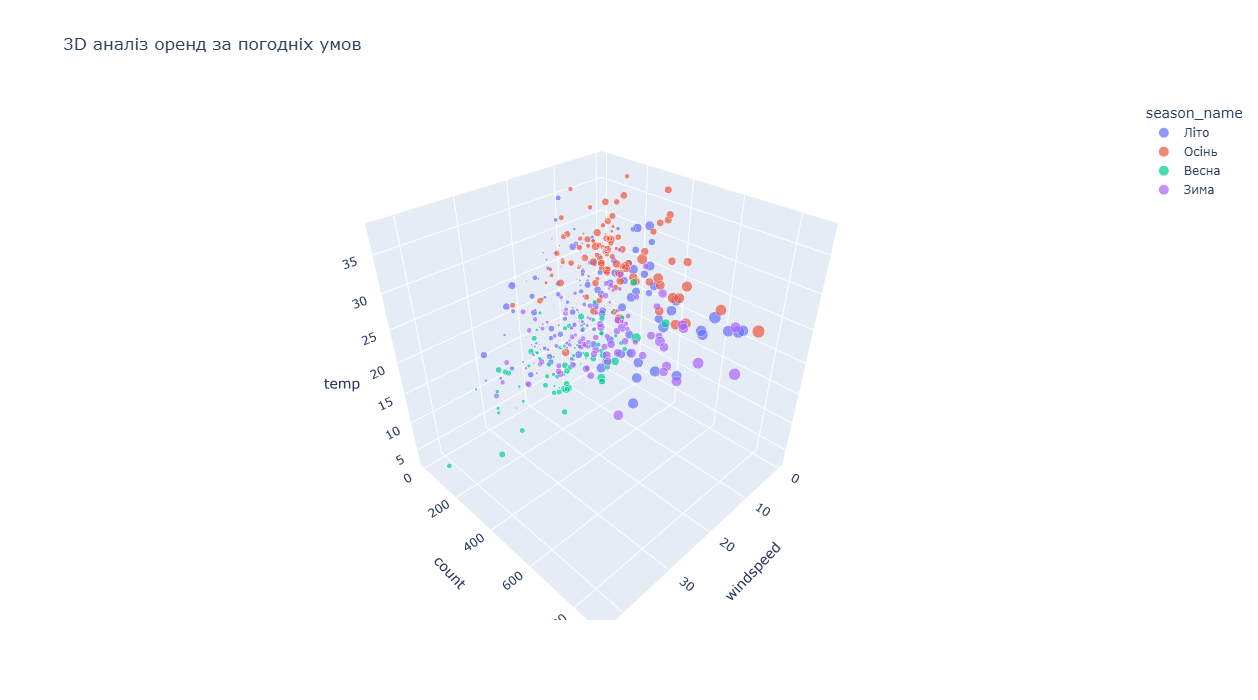

In [16]:
fig = px.scatter_3d(df.sample(500).reset_index(),
                    x='windspeed', y='count', z='temp',
                    color='season_name', size='count',
                    title='3D аналіз оренд за погодніх умов')
fig.update_layout(height=700)
fig.show()

#### Відповіді на питання. Питання для інтерпретації:

#### Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
 Як на мене, 3д візуалізація важка для сприйняття, можливо для аналізу важких наукових данних це може бути дуже доцільно, або при побудові графіків математичних , тригонометричних, одразу можна побачити інсайт, але для бізнес рішень це більше красива модель ніж зрозумілий інструмент.
#### Чи видно кластери в 3D просторі?
чесно, не дуже
#### Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?
Я б обрала декілька 2д ніж одне 3д


## Завдання 6: Експорт та збереження інтерактивних графіків

**Завдання:**
Збережіть побудований раніше дашборд в формат HTML. Також змініть вручну щось на дашборді (зум, виділення частини графіку) і збережіть його як статичне зображення через іконку фотоапарату у формат PNG. Завантажте файли з дашбордом у HTML та PNG (або посилання на них на github) разом з посиланням на цей ноутбук при здачі ДЗ.


In [17]:
# Зберегти як HTML
fig.write_html("dashboard.html")